# Predicting seasonal and event driven disease patterns among students using hospital and weather data

### Name: Arijit Patra
### Reg. No.: 12408191
### Name: Dibyaranjan Prusty
### Reg. No.: 12413130
### Name: Daikho Athishu
### Reg. No.: 12411407

## CA-2

## Importing Libraries

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading Data

In [26]:
df = pd.read_csv("synthetic_hospital_weather_dataset.csv", parse_dates=["date"])
df = df.sort_values("date").reset_index(drop=True)

print(df.shape)
df.head()


(2000, 25)


,loc_key,date,cases_total,air_quality_Sulphur_dioxide,air_quality_gb-defra-index,air_quality_Ozone,air_quality_Carbon_Monoxide,air_quality_Nitrogen_dioxide,air_quality_PM10,air_quality_us-epa-index,...,is_weekend,is_monsoon,is_winter,is_summer,event_flag,cases_total_lag1,cases_total_lag7,cases_total_lag14,cases_total_rollmean_7,cases_total_rollmean_14
0,loc1,2020-01-01,29,37.416822,1,62.834725,0.790986,24.101677,27.469907,3,...,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
1,loc2,2020-01-02,28,20.569833,9,25.010904,0.697489,40.614615,14.142258,1,...,0,0,1,0,0,29.0,NaN,NaN,NaN,NaN
2,loc3,2020-01-03,21,37.216283,6,12.861618,0.597817,75.629475,114.616752,3,...,0,0,1,0,0,28.0,NaN,NaN,NaN,NaN
3,loc3,2020-01-04,35,42.745621,6,39.020895,0.666866,24.159669,27.256834,2,...,1,0,1,0,0,21.0,NaN,NaN,NaN,NaN
4,loc3,2020-01-05,28,15.356428,3,79.395193,0.509853,38.823001,17.956509,4,...,1,0,1,0,0,35.0,NaN,NaN,NaN,NaN


## Basic Info

In [39]:
print(df.shape)
print(df.info())
df.describe().T


(1986, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   loc_key                       1986 non-null   object        
 1   date                          1986 non-null   datetime64[ns]
 2   cases_total                   1986 non-null   int64         
 3   air_quality_Sulphur_dioxide   1986 non-null   float64       
 4   air_quality_gb-defra-index    1986 non-null   int64         
 5   air_quality_Ozone             1986 non-null   float64       
 6   air_quality_Carbon_Monoxide   1986 non-null   float64       
 7   air_quality_Nitrogen_dioxide  1986 non-null   float64       
 8   air_quality_PM10              1986 non-null   float64       
 9   air_quality_us-epa-index      1986 non-null   int64         
 10  air_quality_PM2.5             1986 non-null   float64       
 11  year               

,count,mean,min,25%,50%,75%,max,std
date,1986,2022-10-03 12:00:00,2020-01-15 00:00:00,2021-05-25 06:00:00,2022-10-03 12:00:00,2024-02-11 18:00:00,2025-06-22 00:00:00,NaN
cases_total,1986.0,30.18429,14.0,26.0,30.0,34.0,49.0,5.350136
air_quality_Sulphur_dioxide,1986.0,25.262853,1.007061,13.181375,25.151108,37.53945,49.969074,14.086822
air_quality_gb-defra-index,1986.0,5.108258,1.0,3.0,5.0,7.0,9.0,2.558113
air_quality_Ozone,1986.0,51.792149,5.083773,29.382009,51.335298,74.910387,99.973432,26.959718
air_quality_Carbon_Monoxide,1986.0,1.047366,0.100843,0.572916,1.045686,1.510016,1.999594,0.543875
air_quality_Nitrogen_dioxide,1986.0,42.080102,5.044919,23.147563,41.01244,61.374716,79.968465,22.125198
air_quality_PM10,1986.0,79.652581,10.07958,44.06707,78.983776,114.430562,149.949121,40.679129
air_quality_us-epa-index,1986.0,2.492447,1.0,2.0,2.0,4.0,4.0,1.117839
air_quality_PM2.5,1986.0,52.639138,5.001808,28.955179,52.211355,77.133248,99.959478,27.654694


## CREATE LAG AND ROLLING FEATURES

In [27]:
df["cases_total_lag1"]  = df["cases_total"].shift(1)
df["cases_total_lag7"]  = df["cases_total"].shift(7)
df["cases_total_lag14"] = df["cases_total"].shift(14)

df["cases_total_rollmean_7"]  = df["cases_total"].rolling(7).mean()
df["cases_total_rollmean_14"] = df["cases_total"].rolling(14).mean()


## REMOVE ROWS WITH NA CAUSED BY LAGS/ROLLING

In [28]:
na_cols = [
    "cases_total_lag1",
    "cases_total_lag7",
    "cases_total_lag14",
    "cases_total_rollmean_7",
    "cases_total_rollmean_14"
]

df = df.dropna(subset=na_cols).reset_index(drop=True)

print("Remaining rows:", df.shape)


Remaining rows: (1986, 25)


## TIME SERIES SPLIT

In [30]:
dates_sorted = df["date"].sort_values().unique()
cutoff_idx = int(0.8 * len(dates_sorted))
cutoff_date = dates_sorted[cutoff_idx]

train = df[df["date"] <= cutoff_date].copy()
test  = df[df["date"] >  cutoff_date].copy()

print("Train:", train.shape, "| Test:", test.shape)


Train: (1589, 25) | Test: (397, 25)


## FEATURE SELECTION

In [31]:
target = "cases_total"

drop_cols = ["date", target]

X_train = train.drop(columns=drop_cols)
y_train = train[target]

X_test = test.drop(columns=drop_cols)
y_test = test[target]

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


X_train: (1589, 23)
X_test: (397, 23)


## IDENTIFY COLUMN TYPES

In [32]:
cat_cols = [c for c in X_train.columns if X_train[c].dtype == "object"]
num_cols = [c for c in X_train.columns if c not in cat_cols]

print("Numeric:", len(num_cols), "Categorical:", len(cat_cols))


Numeric: 22 Categorical: 1


## PREPROCESSOR PIPELINE

In [33]:
pre = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler(with_mean=False))
        ]), num_cols),

        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols)
    ],
    remainder="drop"
)


## RANDOM FOREST

In [34]:
rf = Pipeline(steps=[
    ("pre", pre),
    ("model", RandomForestRegressor(n_estimators=400, random_state=42))
])

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, pred_rf))
rf_mae  = mean_absolute_error(y_test, pred_rf)
rf_r2   = r2_score(y_test, pred_rf)

print("Random Forest Results:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)
print("R²:", rf_r2)


Random Forest Results:
RMSE: 5.097559247348352
MAE: 4.10345717884131
R²: 0.055908629707504987


## LINEAR REGRESSION

In [35]:
lin = Pipeline(steps=[
    ("pre", pre),
    ("model", LinearRegression())
])

lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

lin_rmse = np.sqrt(mean_squared_error(y_test, pred_lin))
lin_mae  = mean_absolute_error(y_test, pred_lin)
lin_r2   = r2_score(y_test, pred_lin)

print("Linear Regression Results:")
print("RMSE:", lin_rmse)
print("MAE:", lin_mae)
print("R²:", lin_r2)


Linear Regression Results:
RMSE: 5.019674194212524
MAE: 4.021647056021093
R²: 0.08453757541700013


## COMPARE MODELS

In [36]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression"],
    "RMSE": [rf_rmse, lin_rmse],
    "MAE":  [rf_mae,  lin_mae],
    "R²":   [rf_r2,   lin_r2]
})

results


,Model,RMSE,MAE,R²
0,Random Forest,5.097559,4.103457,0.055909
1,Linear Regression,5.019674,4.021647,0.084538


## ACTUAL VS PREDICTED PLOT (OPTIONAL)

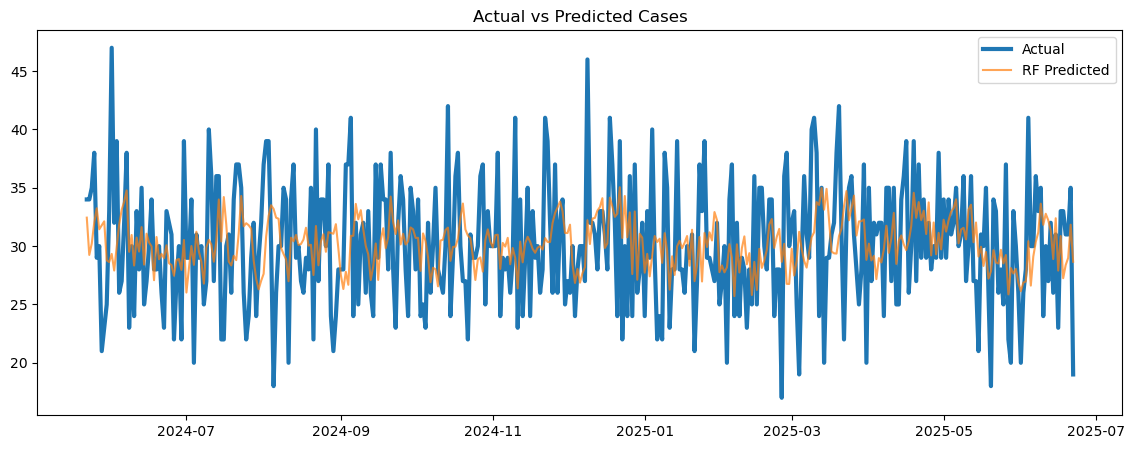

In [37]:
plt.figure(figsize=(14,5))
plt.plot(test["date"], y_test, label="Actual", linewidth=3)
plt.plot(test["date"], pred_rf, label="RF Predicted", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Cases")
plt.show()


## FORECASTING (USES RANDOM FOREST)

In [38]:
future_dates = pd.date_range(df["date"].max() + pd.Timedelta(days=1), periods=30)

last_row = df.iloc[-1:].copy()

future_rows = []
for d in future_dates:
    row = last_row.copy()
    row["date"] = d
    row["year"] = d.year
    row["month"] = d.month
    row["week"] = d.isocalendar().week
    row["dow"] = d.dayofweek
    row["is_weekend"] = int(d.dayofweek in [5,6])
    row["is_monsoon"] = int(d.month in [6,7,8,9])
    row["is_winter"] = int(d.month in [12,1,2])
    row["is_summer"] = int(d.month in [3,4,5])
    future_rows.append(row)

future_df = pd.concat(future_rows, ignore_index=True)
future_X = future_df.drop(columns=["date", target])

future_df["forecast_cases"] = rf.predict(future_X)
future_df[["date", "forecast_cases"]]


,date,forecast_cases
0,2025-06-23,28.1825
1,2025-06-24,28.2725
2,2025-06-25,28.3300
3,2025-06-26,28.2900
4,2025-06-27,28.4950
5,2025-06-28,28.5375
6,2025-06-29,28.7075
7,2025-06-30,28.1825
8,2025-07-01,28.3275
9,2025-07-02,28.3850


## Missing Value Heatmap

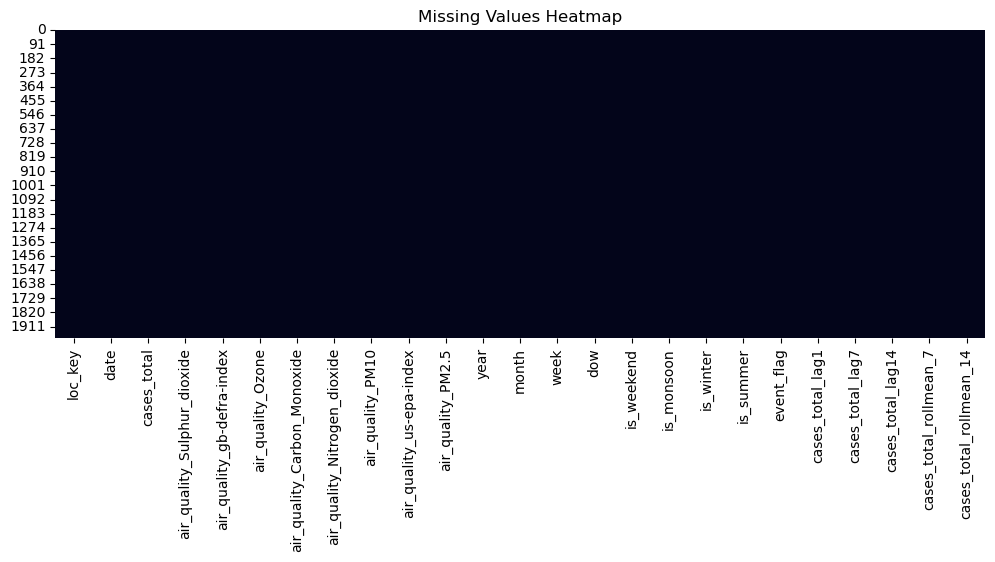

In [40]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## Cases Over Time

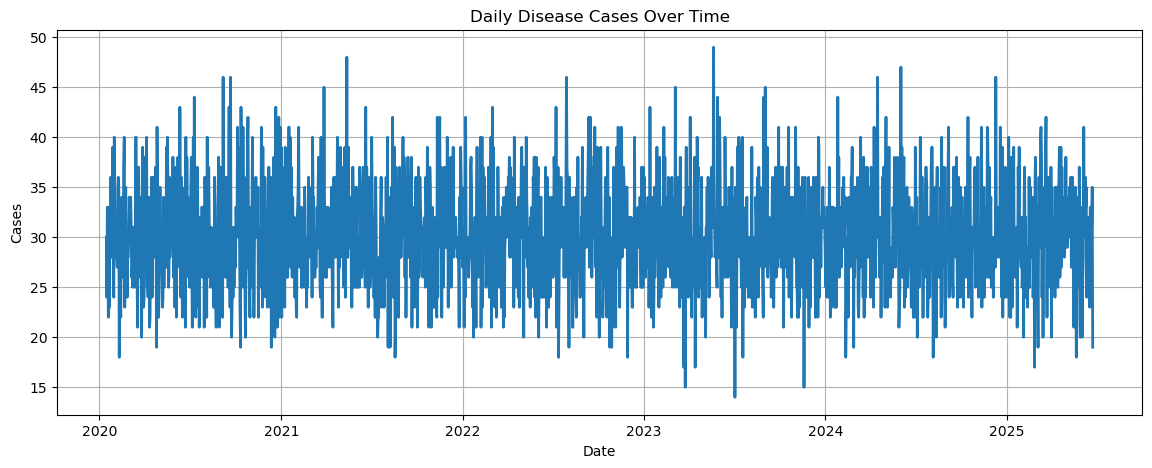

In [41]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["cases_total"], linewidth=2)
plt.title("Daily Disease Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(True)
plt.show()


## Distribution Plot

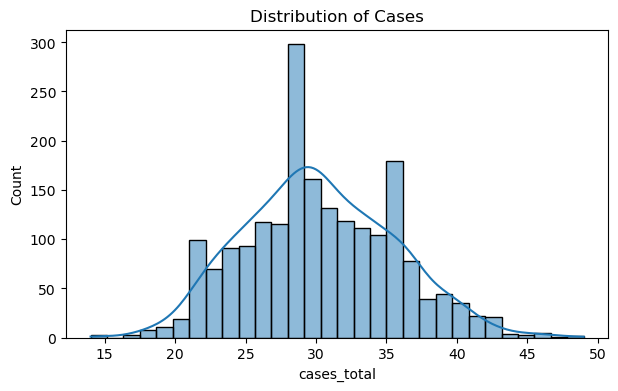

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(df["cases_total"], kde=True, bins=30)
plt.title("Distribution of Cases")
plt.show()


## Monthly Seasonality

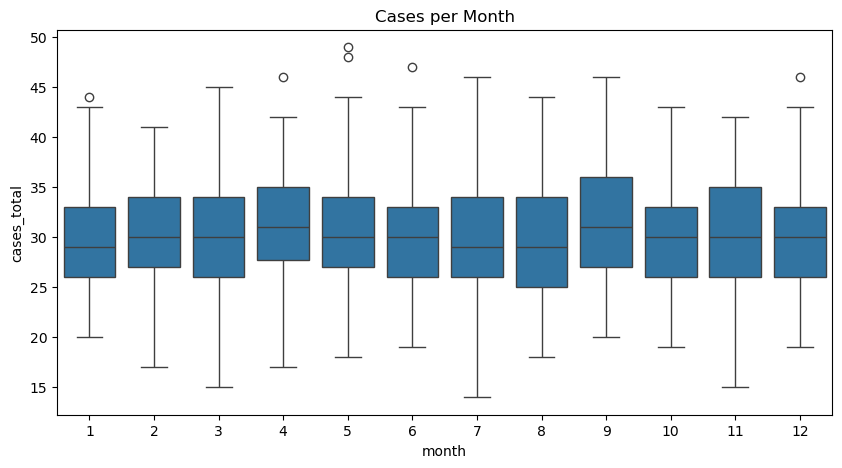

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["month"], y=df["cases_total"])
plt.title("Cases per Month")
plt.show()


## Weekly Seasonality (Week of Year)

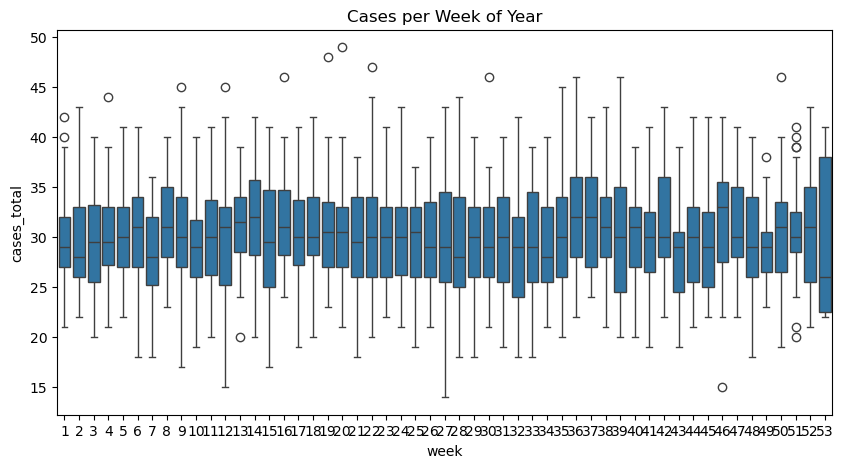

In [44]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["week"], y=df["cases_total"])
plt.title("Cases per Week of Year")
plt.show()


## Day of Week Patterns

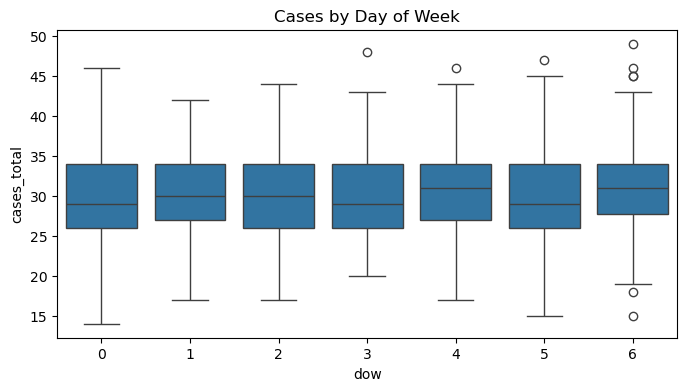

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["dow"], y=df["cases_total"])
plt.title("Cases by Day of Week")
plt.show()


## Weather Correlation Heatmap

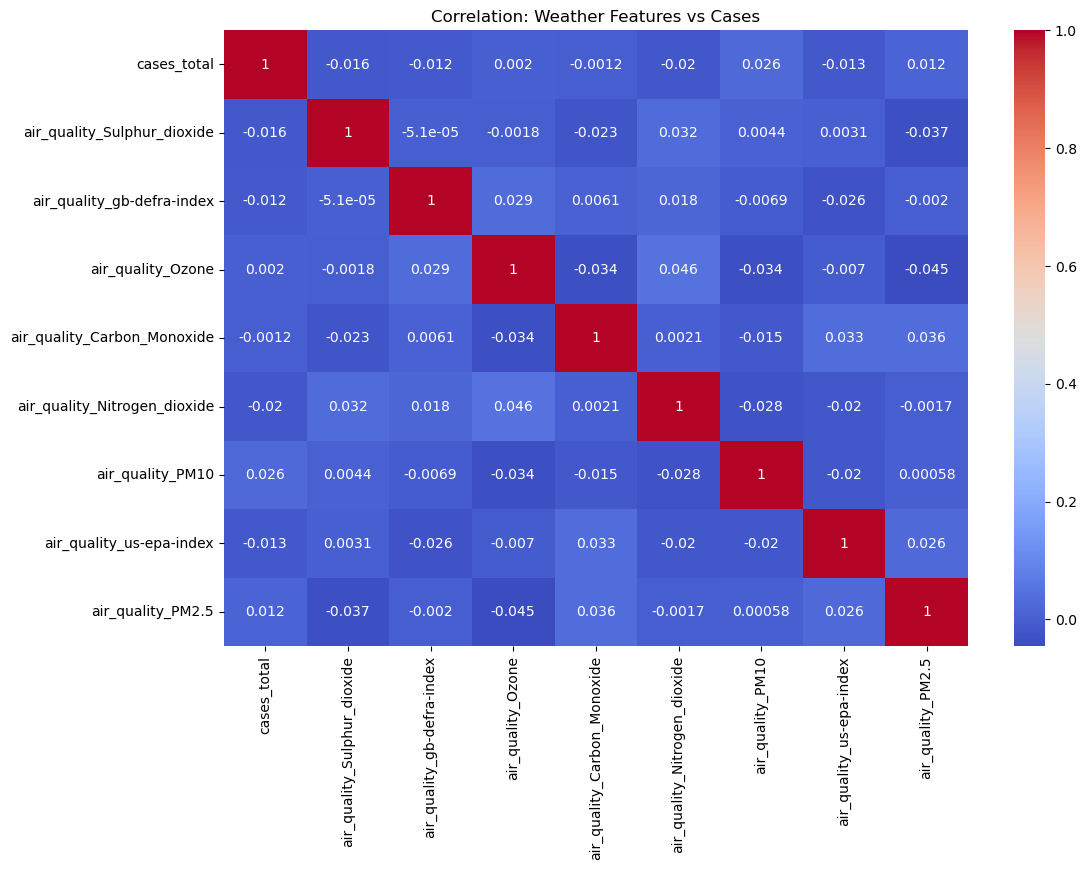

In [46]:
weather_cols = [c for c in df.columns if "air_quality" in c]

plt.figure(figsize=(12,8))
sns.heatmap(df[["cases_total"] + weather_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation: Weather Features vs Cases")
plt.show()


## Pair Plot (Sampled to Avoid Slow Rendering)

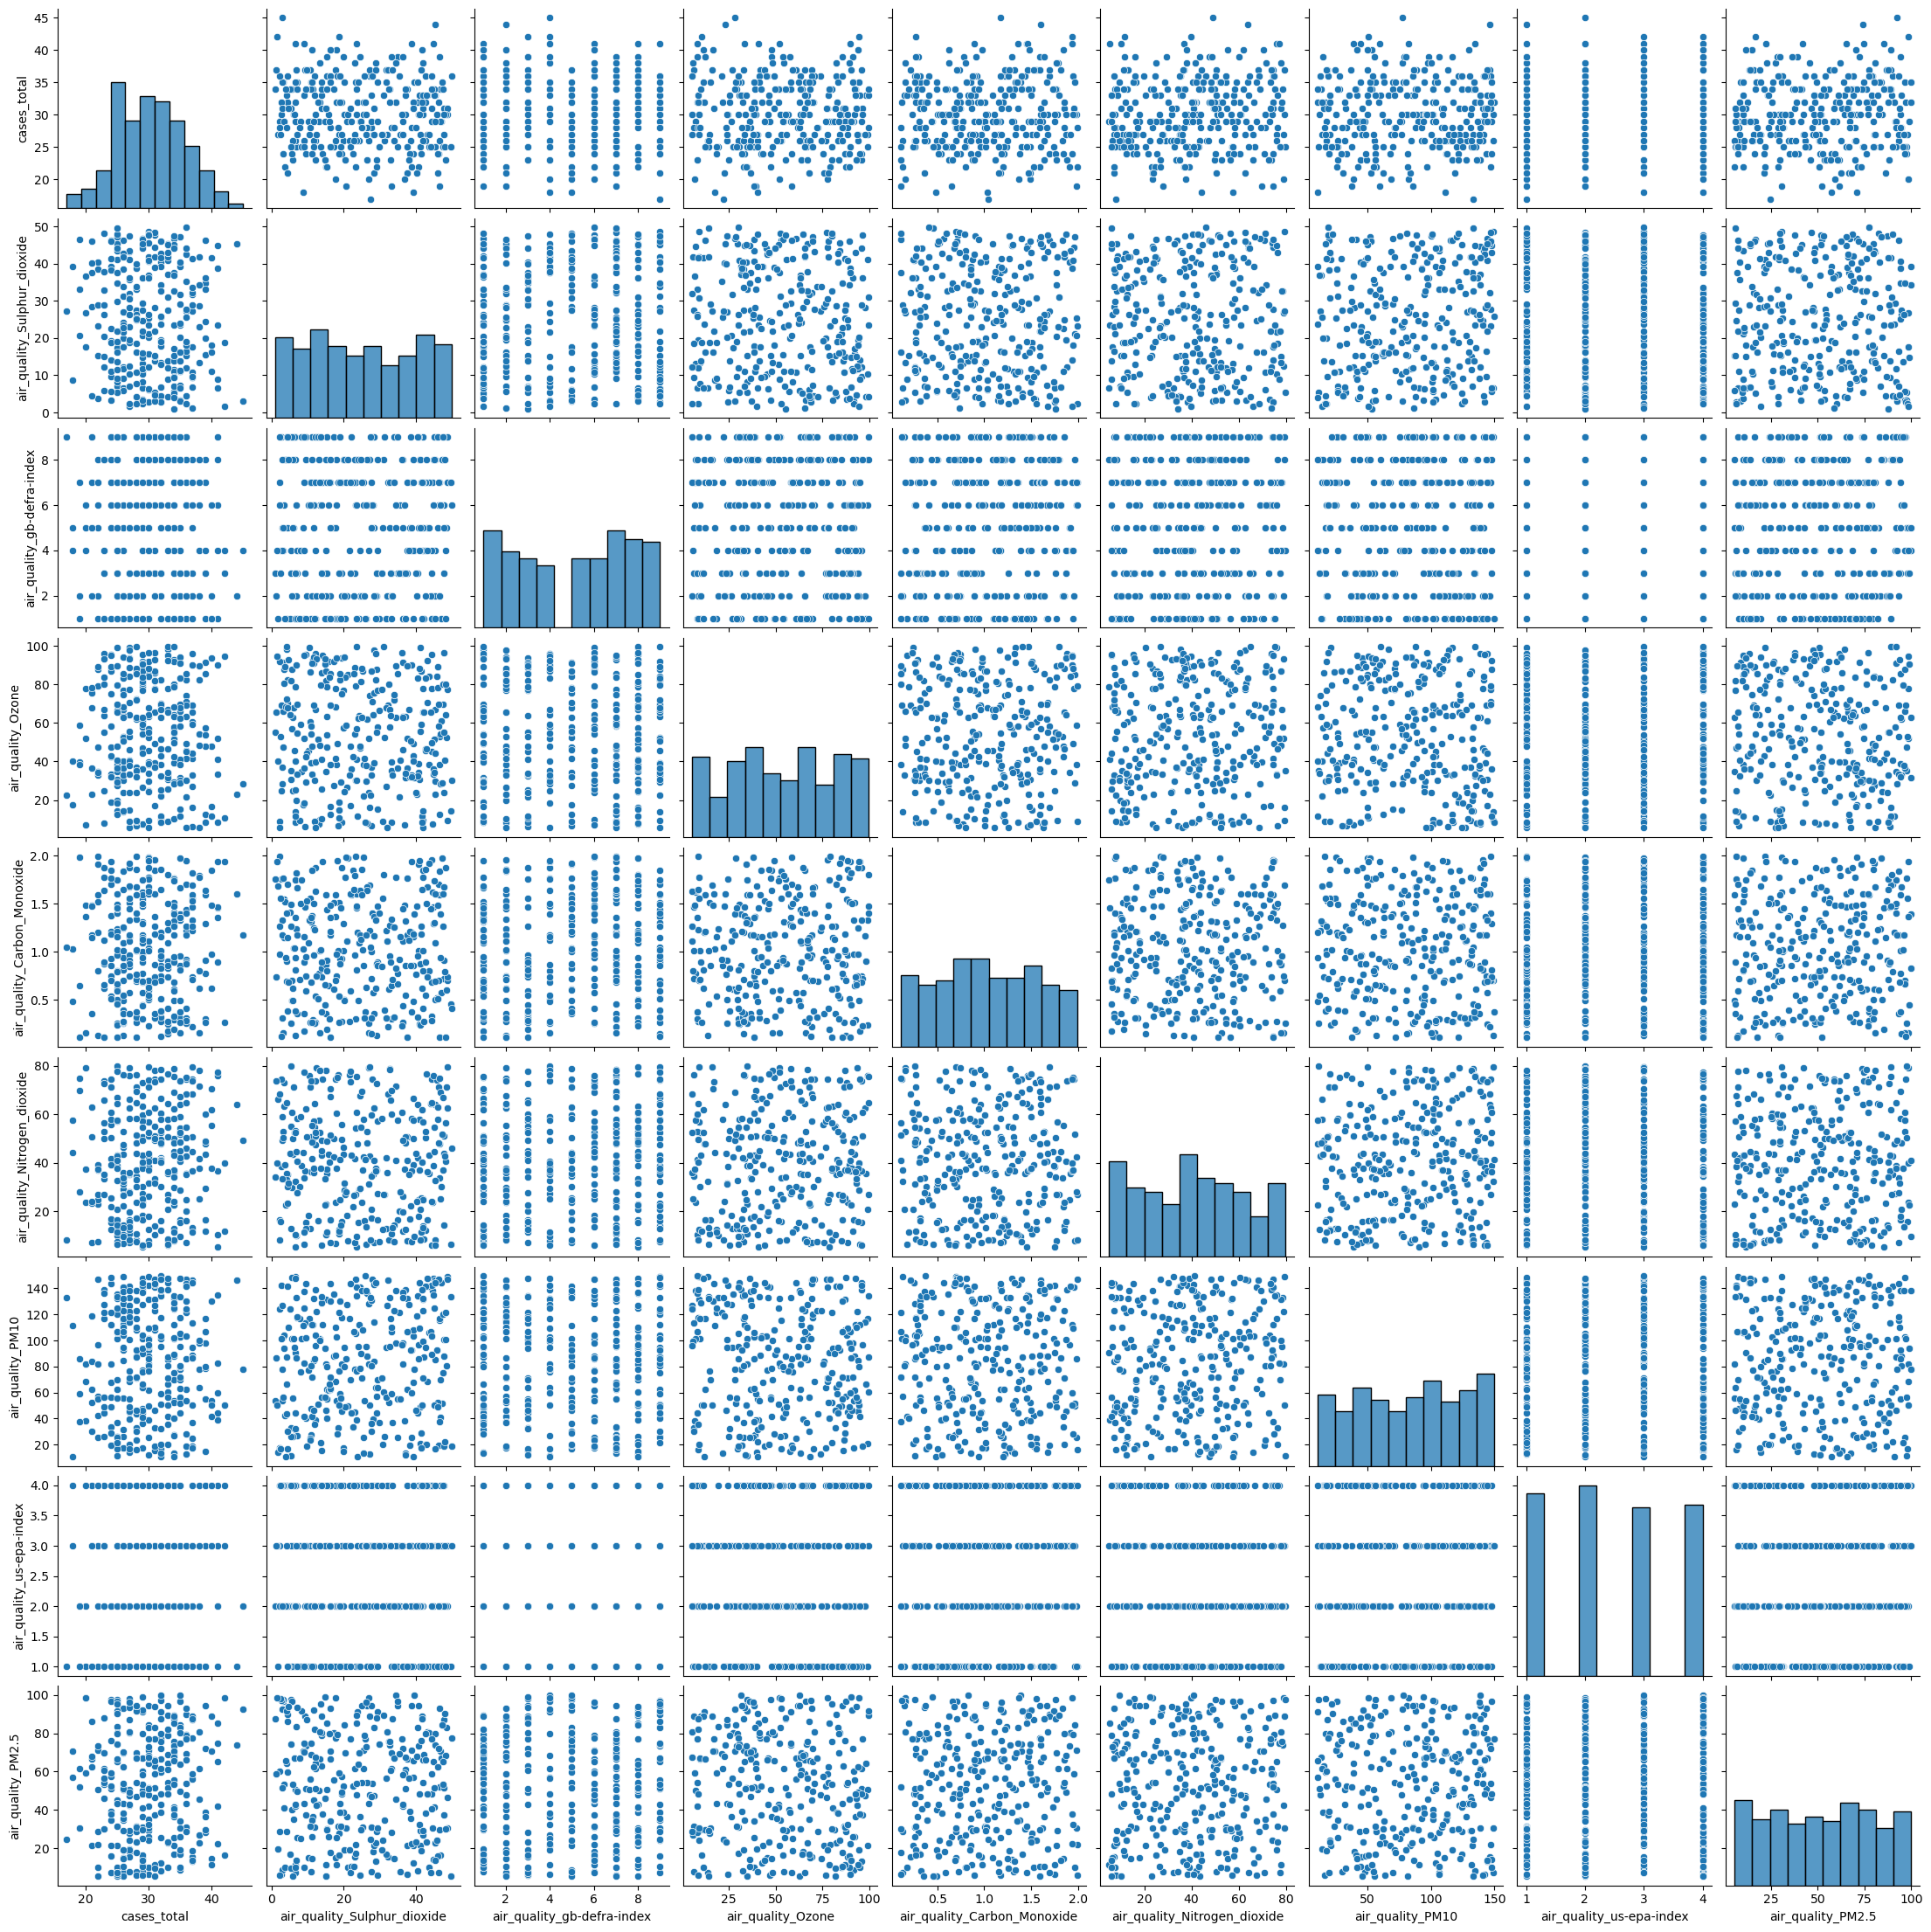

In [47]:
sns.pairplot(df[["cases_total"] + weather_cols].sample(300)) 
plt.show()


## Lag Feature Visualization

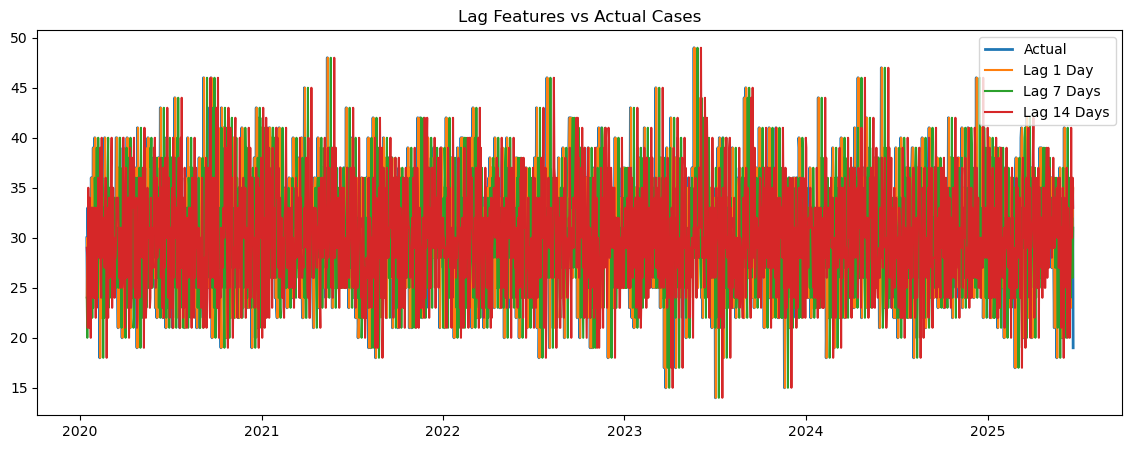

In [48]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["cases_total"], label="Actual", linewidth=2)
plt.plot(df["date"], df["cases_total_lag1"], label="Lag 1 Day")
plt.plot(df["date"], df["cases_total_lag7"], label="Lag 7 Days")
plt.plot(df["date"], df["cases_total_lag14"], label="Lag 14 Days")
plt.legend()
plt.title("Lag Features vs Actual Cases")
plt.show()


## Rolling Mean Plot

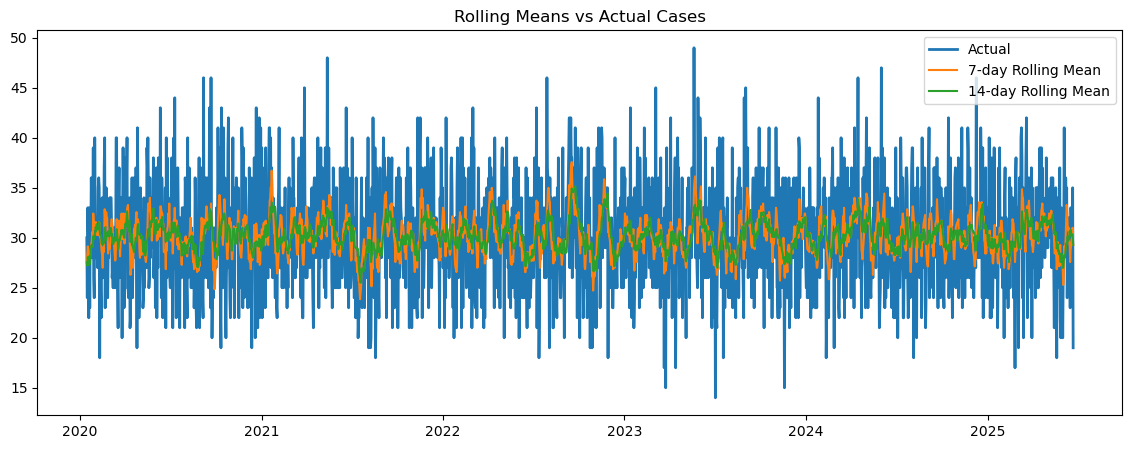

In [49]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["cases_total"], label="Actual", linewidth=2)
plt.plot(df["date"], df["cases_total_rollmean_7"], label="7-day Rolling Mean")
plt.plot(df["date"], df["cases_total_rollmean_14"], label="14-day Rolling Mean")
plt.legend()
plt.title("Rolling Means vs Actual Cases")
plt.show()


## Time Series Decomposition

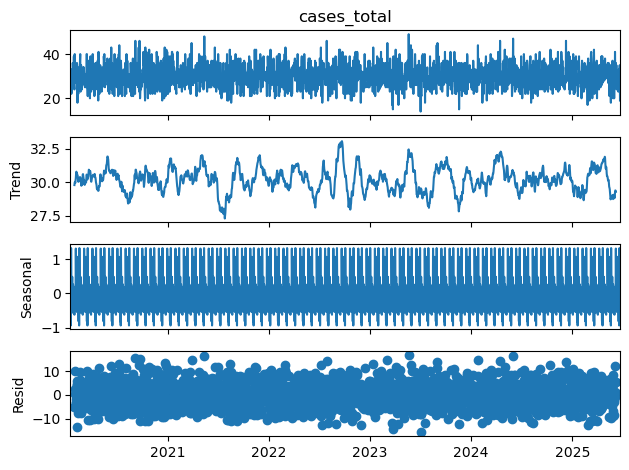

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_ts = df.set_index("date")["cases_total"]

result = seasonal_decompose(df_ts, model="additive", period=30)
result.plot()
plt.show()


## Outlier Detection

In [51]:
Q1 = df["cases_total"].quantile(0.25)
Q3 = df["cases_total"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["cases_total"] < Q1 - 1.5*IQR) |
              (df["cases_total"] > Q3 + 1.5*IQR)]

print("Outliers found:", len(outliers))
outliers.head()


Outliers found: 3


,loc_key,date,cases_total,air_quality_Sulphur_dioxide,air_quality_gb-defra-index,air_quality_Ozone,air_quality_Carbon_Monoxide,air_quality_Nitrogen_dioxide,air_quality_PM10,air_quality_us-epa-index,...,is_weekend,is_monsoon,is_winter,is_summer,event_flag,cases_total_lag1,cases_total_lag7,cases_total_lag14,cases_total_rollmean_7,cases_total_rollmean_14
484,loc2,2021-05-13,48,7.789137,3,80.727667,1.795528,41.728598,103.797188,3,...,0,0,0,1,0,28.0,30.0,33.0,32.714286,33.000000
1222,loc1,2023-05-21,49,27.509121,5,64.029122,1.317483,77.654462,77.946999,2,...,1,0,0,1,0,31.0,31.0,31.0,35.000000,33.071429
1599,loc2,2024-06-01,47,2.661576,4,26.717274,0.224632,53.775135,105.777987,1,...,1,1,0,0,0,33.0,38.0,28.0,29.714286,31.642857


## Event vs Non-event Cases

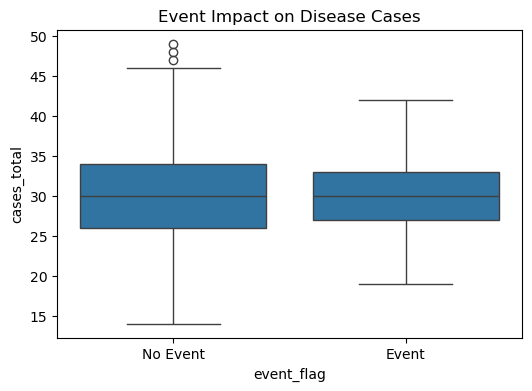

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["event_flag"], y=df["cases_total"])
plt.xticks([0, 1], ["No Event", "Event"])
plt.title("Event Impact on Disease Cases")
plt.show()


## Seasonal Flags

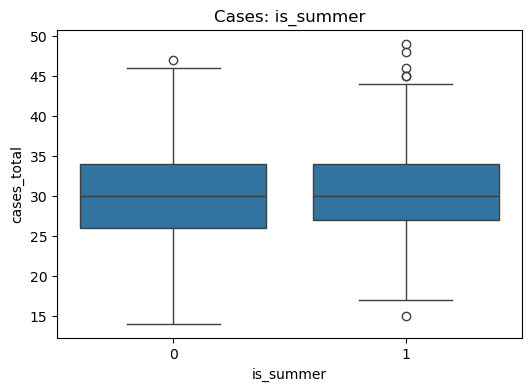

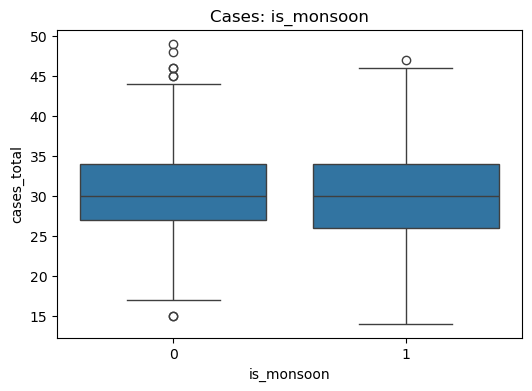

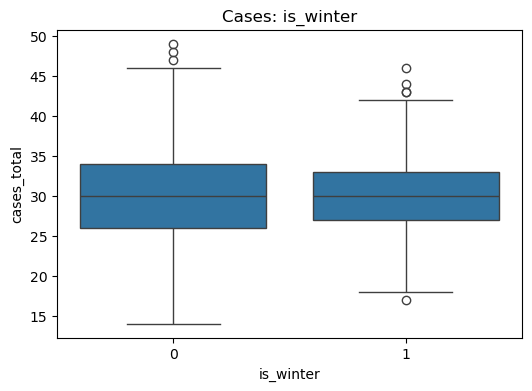

In [53]:
flags = ["is_summer", "is_monsoon", "is_winter"]

for flag in flags:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[flag], y=df["cases_total"])
    plt.title(f"Cases: {flag}")
    plt.show()


## Feature Importance (Random Forest)

C:\Users\ARIJIT\AppData\Local\Temp\ipykernel_11572\712681903.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")


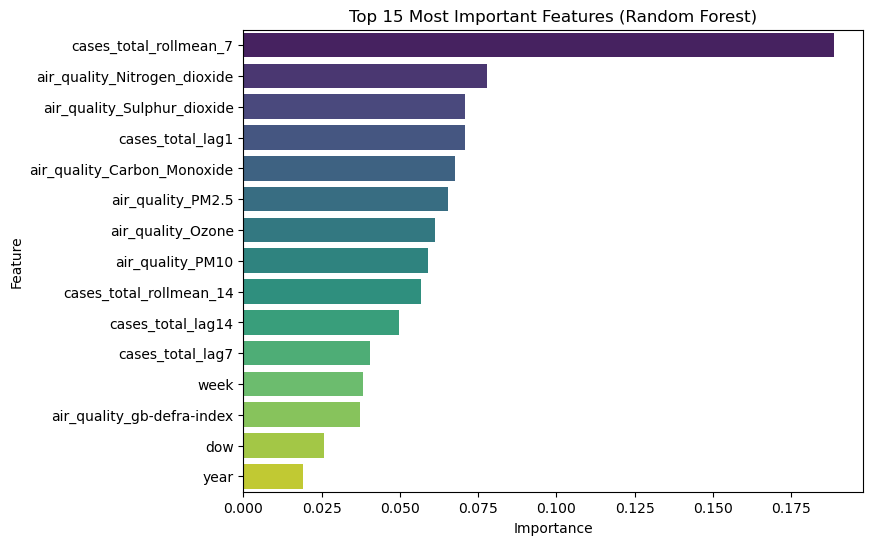

In [55]:
# Extract feature names after preprocessing
feature_names = list(pre.transformers_[0][2]) + \
                list(rf.named_steps["pre"].transformers_[1][1]["oh"].get_feature_names_out(cat_cols))

# Extract importance values
importances = rf.named_steps["model"].feature_importances_

# Create DataFrame
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False).head(15)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.show()


## Forecasting Next 30 Days

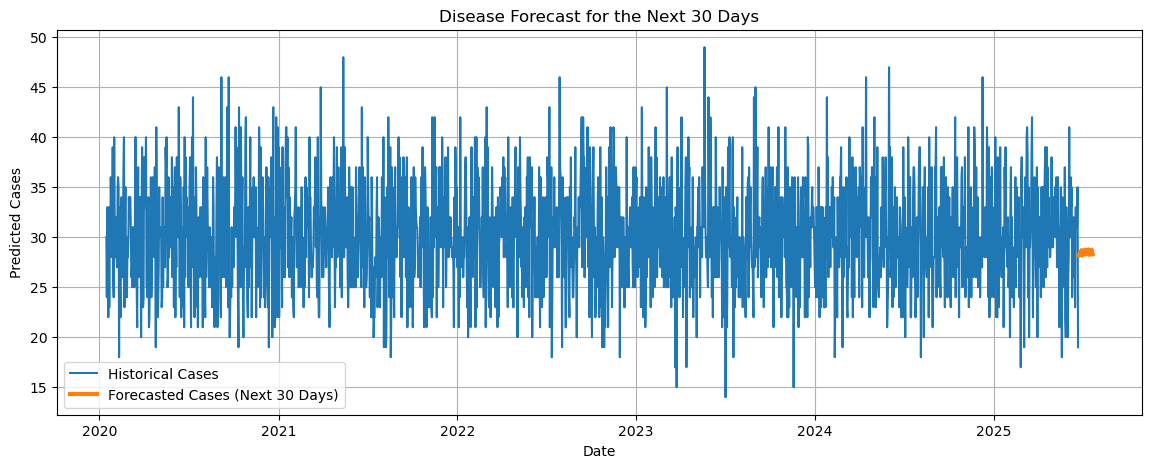

In [57]:
plt.figure(figsize=(14,5))
plt.plot(df["date"], df["cases_total"], label="Historical Cases")
plt.plot(future_df["date"], future_df["forecast_cases"], label="Forecasted Cases (Next 30 Days)", linewidth=3)
plt.title("Disease Forecast for the Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Predicted Cases")
plt.legend()
plt.grid(True)
plt.show()
